# Portfolio 2: Differential Drive Class (E25) 

> Create a class for controlling a differential drive robot. You must test it using your **Practice PCBs**, *not* the Pansa Boards.

Type:
- [ ] Extra Credit Activities
- [x] Portfolio (Group)

Student information
  - Student name: Anders Pramvig, Anders Jacobsen, Emil O'Kane, Magnus Bruus og Victor Süberkrüb
  - Student mail: apram25@student.sdu.dk, anjac25@student.sdu.dk, emouk25@student.sdu.dk, mabru25@student.sdu.dk, visub25@student.sdu.dk

*Group number:* 5

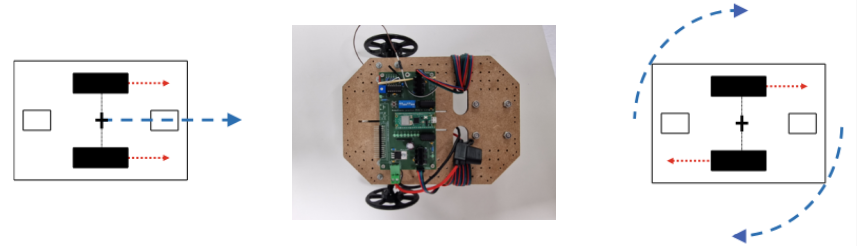

# Differential Drive Class

Create a class for controlling a differential drive robot with two wheels; a `left` and a `right`, utilizing either your own `StepperMotor` class or the one provided for your after the deadline of the Extra Point Activity #2.


You can choose to start with the template below or make your own implementation:

File: `differential_drive.py`

In [ ]:
from stepper_motor import StepperMotor
import time
import math

class DifferentialDrive:
    def __init__(self, left, right):
        """
        Initialize the navigation system with two stepper motors.

        :param left: Instance of StepperMotor class for the left motor.
        :param right: Instance of StepperMotor class for the right motor.

        OTHER PARAMS?

        """

        self.left = left
        self.right = right

        # ...continue your work here

        # Ensure that all motors are turned off at
        self.stop()

    def stop(self):
        self.left.stop()
        self.right.stop()


## Assignment 1: Driving forward or backward

Implement a function in your class that can make the robot drive either `forward` or `backward` a given distance.

You can choose to start with the template below or make your own implementation:

In [ ]:

from stepper_motor import StepperMotor #Example class from Jes
import time
import math

class DifferentialDrive:
    def __init__(self, left, right):
        """
        Initialize the navigation system with two stepper motors.

        :param left: Instance of StepperMotor class for the left motor.
        :param right: Instance of StepperMotor class for the right motor.

        """

        self.left = left
        self.right = right

        
        self.stop()    

    def forward(self, steps, delay_us):
            step_seq_len = len(self.left.step_sequence)
            for _ in range(steps):
                for i in range(step_seq_len):
                    self.left.set_step(self.left.step_sequence[i])
                    self.right.set_step(self.right.step_sequence[i])
            self.stop()

    def backward(self, steps, delay_us):
        step_seq_len = len(self.left.step_sequence)
        for _ in range(steps):
            for i in range(step_seq_len):
                self.left.set_step(self.left.step_sequence[-i])
                self.right.set_step(self.right.step_sequence[-i])
        self.stop()
        
    def stop(self):
        self.left.stop()
        self.right.stop()

Start with validating that you can command the stepper motor to make one full turn exactly.
* ...so, how many steps on for full rotation?

**Remember** that the `step_sequence` defines four steps, not only one.

- 50 step sequences and 200 steps for one full rotation. 

## Assignment 2: Move a given distance

Implement a function in your class that can make the robot drive either `forward` or `backward` a given distance.

In [ ]:

from stepper_motor import StepperMotor #Example class from Jes
import time
import math

class DifferentialDrive:
    def __init__(self, left, right):
        """
        Initialize the navigation system with two stepper motors.

        :param left: Instance of StepperMotor class for the left motor.
        :param right: Instance of StepperMotor class for the right motor.

        """

        self.left = left
        self.right = right

        
        self.stop()    

    def forward(self, steps):
            step_seq_len = len(self.left.step_sequence)
            for _ in range(steps):
                for i in range(step_seq_len):
                    self.left.set_step(self.left.step_sequence[i])
                    self.right.set_step(self.right.step_sequence[i])
            self.stop()

    def backward(self, steps):
        step_seq_len = len(self.left.step_sequence)
        for _ in range(steps):
            for i in range(step_seq_len):
                self.left.set_step(self.left.step_sequence[-i])
                self.right.set_step(self.right.step_sequence[-i])
        self.stop()
        
    def stop(self):
        self.left.stop()
        self.right.stop()

    def cm_to_steps(self, distance_cm):
            """
            Convert a distance in centimeters to the corresponding number of motor steps.
            :param distance_cm: Distance to move in centimeters.
            :return: Number of steps corresponding to the given distance.
            """

            # --> wheel_circumference_cm: 

            wheel_diameter_cm = 8.7  # Example diameter in cm
            circumference_cm = 2 * math.pi * (wheel_diameter_cm / 2)

            # --> steps_per_revolution:
            step_sequences_per_revolution = 50  # Example value, adjust as needed

            # 1) Calculate the distance per step
            distance_per_step_cm = circumference_cm / step_sequences_per_revolution

            # 2) Calculate the number of steps
            steps = int(distance_cm / distance_per_step_cm)
            
            #Print for debugging
            print(f"Distance per step: {distance_per_step_cm} cm")

            # Return the calculated number of steps based on the distance
            return steps
            

    def move_distance(self, distance_cm, direction):
            """
            Move the robot forward or backward a specific distance in centimeters.

            :param distance_cm: Distance to move in centimeters.
            :param direction: Direction to move, either 'forward' or 'backward'.
            """

            steps = self.cm_to_steps(distance_cm)
            if direction == "forward":
                self.forward(steps)
            
            if direction == "backward":
                self.backward(steps)

            self.stop()


## Assignment 3: Turn left or right

**3.1: Turn either left or right**

Implement such that your class can either turn left or right with a given number of steps.

You can choose to start with the template below or make your own implementation:

In [ ]:
def move_one_stepper(self, steps, stepper):
    """
    Move either left or right stepper a certain amount of steps.
    
    :param steps (INT): Number of steps to turn
    :param stepper (STR): Stepper to turn
    
    """
    if stepper == "left":
        step_seq_len = len(self.left.step_sequence)
        for _ in range(steps):
            for i in range(step_seq_len):
                self.left.set_step(self.left.step_sequence[i])
    elif stepper == "right":
        for _ in range(steps):
            for i in range(step_seq_len):
                self.right.set_step(self.left.step_sequence[i])
    else:
        raise ValueError("Must be right or left")
        
def turn_steps(self, direction, steps_for_rotation):
    """
    Turns the robot a given number of steps in a specified direction.
    
    :param direction (STR): The direction we want to move in.
    :param steps_for_rotation (INT): Amount of steps we want to move.
    """
    
    if direction == "right":
        self.move_one_stepper(steps_for_rotation, "left")
        
    elif direction == "left":
        self.move_one_stepper(steps_for_rotation, "right")
    else:
        raise ValueError("Must be right or left")
    self.stop()
        
def turn_degrees(self, direction, degrees):
    """
    Turns the robot a given number of degrees in a specified direction
    
    :param direction (STR): The direction we want to turn in.
    :param degrees (INT): Amount of degrees we want to turn.
    """
    circumference = math.pi * 25
    distance = circumference/(360/degrees)
    steps = self.cm_to_steps(distance)*2
    
    if direction == "right":
        self.move_one_stepper(steps, "left")
        
    elif direction == "left":
        self.move_one_stepper(steps, "right")
    else:
        raise ValueError("Must be right or left")
    self.stop()

**3.2: Turn a given number of degrees**

Implement a function in your class that can make the robot turn a given number (`int` between 0 and 359) of degrees to either the left or right.

You can choose to start with the template below or make your own implementation:

**3.2.1: Make a function for in-place rotation**

By rotating one wheel forward and the other backward at the same speed, the robot can rotate around its center point.


In [ ]:
def turn_in_place(self, direction, degrees):
    """
    Turns the robot around its axis in a given number of degrees
    
    :param direction (STR): The direction we want to turn in.
    :param degrees (INT): Amount of degrees we want to turn.

    """
    circumference = math.pi * 25
    distance = circumference/(360/degrees)
    steps = self.cm_to_steps(distance)
    
    if direction == "right":
        step_seq_len = len(self.left.step_sequence)
        for _ in range(steps):
            for i in range(step_seq_len):
                self.left.set_step(self.left.step_sequence[i])
                self.right.set_step(self.right.step_sequence[-i])
        self.stop()
        
    elif direction == "left":
        step_seq_len = len(self.left.step_sequence)
        for _ in range(steps):
            for i in range(step_seq_len):
                self.left.set_step(self.left.step_sequence[-i])
                self.right.set_step(self.right.step_sequence[i])
        self.stop()
    else:
        raise ValueError("Must be right or left")
    self.stop()

**3.2.2: Make a function for turning Left or Right with one wheel only**

Either the left or right wheel stops, while the other wheel rotates forward.


In [ ]:
def move_one_stepper(self, steps, stepper):
    """
    Move either left or right stepper a certain amount of steps.
    
    :param steps (INT): Number of steps to turn
    :param stepper (STR): Stepper to turn
    
    """
    if stepper == "left":
        step_seq_len = len(self.left.step_sequence)
        for _ in range(steps):
            for i in range(step_seq_len):
                self.left.set_step(self.left.step_sequence[i])
    elif stepper == "right":
        for _ in range(steps):
            for i in range(step_seq_len):
                self.right.set_step(self.left.step_sequence[i])
    else:
        raise ValueError("Must be right or left")

**(Optional) 3.3: Curved movement**

Implement a function in your class that can make the robot turn in a curved movement, meaning one wheel rotates faster than the other, causing the robot to follow a circular path.

The curvature of the path depends on the difference in wheel speeds or number of steps within the same timeframe.

## Assignment 4: Validation

Create a program that includes your **Differential Drive** and **Stepper Motor** class, and makes the robot drive in a square of 1x1 meter.


* Record the result and link to the video of it down in the hand-in section.


**The example below is for inspiration:**

In [ ]:
from machine import Pin, Timer  # Import Pin and Timer classes from the machine module

from stepper_motor import StepperMotor  # Import the StepperMotor class
from differential_drive import DifferentialDrive  # Import the DifferentialDrive class

import time  # Import time module for delays

# Setup an LED pin and timer for blinking (used as a status indicator)
led = Pin("LED", Pin.OUT)  # Initialize the LED pin
timer = Timer()  # Initialize a timer

# Define a function to toggle the LED state
def blink(timer):
    led.toggle()  # Toggle the LED on or off

# Initialize the timer to call the blink function every second
timer.init(freq=1.0, mode=Timer.PERIODIC, callback=blink)

# Example usage
if __name__ == '__main__':
    # Initialize the left and right stepper motors
    # Each motor is connected to 4 GPIO pins, has a PWM 30% and a frequency of 16_000 Hz using micro-stepping (16 steps)
    left_motor = StepperMotor([0, 1, 2, 3], step_mode="MICRO", pwm_pct=30, frequency=16_000, micro_steps=16))
    right_motor = StepperMotor([4, 5, 6, 7], step_mode="MICRO", pwm_pct=30, frequency=16_000, micro_steps=16)

    # Initialize the DifferentialDrive with both motors, the wheel diameter, steps per revolution, and wheelbase
    dd_ctrl = DifferentialDrive(left_motor, right_motor,
                                wheel_diameter_cm=8,
                                steps_per_revolution=200,
                                wheelbase_cm=24)

    # Wait for 5 seconds before starting the movement
    # gives you a chance to place the robot on the ground, before execution
    time.sleep(5)

    # Loop 4 times to make the robot move in a square pattern
    for _ in range(4):

        # Move the robot forward by 100 cm
        time.sleep(1)
        ctrl_dd.move_distance(100, "forward", delay_us=500)

        # Turn the robot 90 degrees to the left
        time.sleep(1)
        ctrl_dd.turn_in_place(90, "left", delay_us=500)


# !!! Coffee break after four loops !!!


# Hand-in (Deadline: 26/10, 23:59)

## Video (Assignment 4)
Link to video: (https://youtube.com/shorts/7OuOh4zmttI?feature=share)



## Source code
*Group number: 5

Insert your source code for your final implementation of your `StepperMotor` and `DifferentialDrive` class and a example usage of it (`main.py`):

File: `main.py`

In [ ]:
from differential_drive import DifferentialDrive
from stepper_motor import StepperMotor
import time
# Setup
pins_right = [0,1,2,3]
pins_left = [4,5,6,7]

left = StepperMotor(pins_left, "MICRO", 80, 16000, 80, 200)
right = StepperMotor(pins_right, "MICRO", 80, 16000, 80, 200)

diff = DifferentialDrive(left, right)

# Run
if __name__ == "__main__":
    time.sleep(2) #Quick delay, so we can clear the robot
    for i in range(4):
        diff.move_distance("forward", 100)
        diff.turn_in_place("right", 90)



File: `stepper_motor.py`

In [ ]:
from machine import Pin, PWM
import time

class StepperMotor:
    def __init__(self, pins, step_mode="FULL", pwm_pct=15, frequency=16_000, micro_steps=32, steps_per_rev=200):
        """
        Initialize the stepper motor with given pins, PWM frequency, step mode, and steps per revolution.
        
        :param pins: List of GPIO pin numbers connected to the motor driver.
        :param step_mode: The stepping mode for the motor ("FULL", "HALF", or "MICRO").
        :param pwm_pct: PWM percentage for each motor coil (0 to 100).
        :param frequency: Frequency for the PWM signals in Hz.
        :param micro_steps: Number of micro-steps per full step (used in micro-stepping mode).
        :param [TODO: Implement RPM] steps_per_rev: Number of steps required for one full revolution (default is 200).
        """

        # Initialize PWM for each pin
        self.pins = [PWM(Pin(pin)) for pin in pins]
        
        # Motor parameters
        self.steps_per_rev = steps_per_rev  # Steps per revolution 

        # Set the PWM frequency for all pins
        self.set_frequency(frequency)
 
        # Calculate the PWM value from percentage (65535 is max for 16-bit)
        self.pwm_max = 65535
        self.pwm_val = int(self.pwm_max * pwm_pct / 100)
        self.micro_steps = micro_steps
        self.step_mode = step_mode.upper() # Ensure that is it uppercase letters
        
        # Initialize step counter to track the total number of step sequences
        self.step_counter = 0

        # Choose the step sequence based on the mode (FULL, HALF, or MICRO)
        if self.step_mode == "FULL":
            # Full-step sequence
            self.step_sequence = [
                [self.pwm_val, self.pwm_val, 0, 0],
                [0, self.pwm_val, self.pwm_val, 0],
                [0, 0, self.pwm_val, self.pwm_val],
                [self.pwm_val, 0, 0, self.pwm_val]
            ]
        elif self.step_mode == "HALF":
            # Half-step sequence
            self.step_sequence = [
                [self.pwm_val, 0, 0, 0],
                [self.pwm_val, self.pwm_val, 0, 0],
                [0, self.pwm_val, 0, 0],
                [0, self.pwm_val, self.pwm_val, 0],
                [0, 0, self.pwm_val, 0],
                [0, 0, self.pwm_val, self.pwm_val],
                [0, 0, 0, self.pwm_val],
                [self.pwm_val, 0, 0, self.pwm_val]
            ]
        elif self.step_mode == "MICRO":
            # Generate micro-stepping sequence
            self.step_sequence = self.generate_micro_step_sequence(self.pwm_val, self.micro_steps)
        
        else:
            # Invalid step mode handling
            self.stop_sequence = [0, 0, 0, 0]
            raise ValueError("Invalid step mode! Use 'FULL', 'HALF', or 'MICRO'.")
        
        # Print the step sequence for debugging purposes
        #self.print_step_sequence()
        
        # Sequence to stop the motor (no current in coils)
        self.stop_sequence = [0, 0, 0, 0]
        self._running = False
        

    def generate_micro_step_sequence(self, pwm_val, micro_steps):
        """
        Generates a step sequence for micro-stepping where PWM values increase and decrease alternately.
        
        :param pwm_val: Maximum PWM value for 16-bit resolution (65535).
        :param micro_steps: Number of micro-steps per full step.
        
        :return: A list of lists representing the step sequence for micro-stepping.
        """
        micro_step_size = pwm_val // micro_steps  # Define the micro step size
        step_sequence = []

        # Generate the step sequence for each phase
        # Phase 1: PWM on first pin, decreasing; PWM on second pin, increasing
        for i in range(micro_steps):
            pwm_1 = pwm_val - i * micro_step_size
            pwm_2 = i * micro_step_size
            step_sequence.append([pwm_1, pwm_2, 0, 0])

        # Phase 2: PWM on second pin, decreasing; PWM on third pin, increasing
        for i in range(micro_steps):
            pwm_2 = pwm_val - i * micro_step_size
            pwm_3 = i * micro_step_size
            step_sequence.append([0, pwm_2, pwm_3, 0])

        # Phase 3: PWM on third pin, decreasing; PWM on fourth pin, increasing
        for i in range(micro_steps):
            pwm_3 = pwm_val - i * micro_step_size
            pwm_4 = i * micro_step_size
            step_sequence.append([0, 0, pwm_3, pwm_4])

        # Phase 4: PWM on fourth pin, decreasing; PWM on first pin, increasing
        for i in range(micro_steps):
            pwm_4 = pwm_val - i * micro_step_size
            pwm_1 = i * micro_step_size
            step_sequence.append([pwm_1, 0, 0, pwm_4])

        return step_sequence

    def set_frequency(self, frequency):
        """
        Set the frequency for the PWM signals.

        :param frequency: The frequency of the PWM signal in Hz.
        """
        # Apply the given frequency to all pins
        for pin in self.pins:
            pin.freq(frequency)
    
    def move_stepper(self, steps, direction, delay_us):
        """
        
        """
        if direction == "forward":
            direction_step = 1
        elif direction == "backward":
            direction_step = -1
        else:
            raise ValueError("Direction must be 'forward' or 'backward'")
    
        steps = abs(steps)

        for _ in range(steps):
            for step in range(len(self.step_sequence))[::direction_step]:
                self.set_step(self.step_sequence[step])
                time.sleep_us(delay_us)
            
            self.step_counter += direction_step

        self.stop()

    def move_stepper_with_ramp(self, steps, direction, initial_delay_us=2000, final_delay_us=1000, ramp_steps=10):
        """
        Move the stepper motor with a speed ramp-up over a specified number of steps.
        
        :param steps: Number of steps to move.
        :param direction: Direction to move. "forward" for forward, "backward" for backward.
        :param initial_delay_us: Initial delay between steps in microseconds (for ramp-up start).
        :param final_delay_us: Final delay between steps in microseconds (for full speed).
        :param ramp_steps: Number of steps to use for ramping up/down.
        """
        # Determine direction of movement
        if direction == "forward":
            direction_step = 1
        elif direction == "backward":
            direction_step = -1
        else:
            raise ValueError("Direction must be 'forward' or 'backward'")
        
        # Move the motor step by step with ramping up speed
        steps = abs(steps)
        delay_increment = (initial_delay_us - final_delay_us) / ramp_steps  # Calculate delay decrement per ramp step
        
        # Ramp-up phase
        for i in range(ramp_steps):
            delay_us = initial_delay_us - i * delay_increment
            for step in range(len(self.step_sequence))[::direction_step]:
                self.set_step(self.step_sequence[step])
                time.sleep_us(int(delay_us))  # Apply delay and cast to int
    
        # Full-speed phase
        for _ in range(steps - 2 * ramp_steps):
            for step in range(len(self.step_sequence))[::direction_step]:
                self.set_step(self.step_sequence[step])
                time.sleep_us(final_delay_us)  # Apply full-speed delay
    
        # Ramp-down phase
        for i in range(ramp_steps):
            delay_us = final_delay_us + i * delay_increment
            for step in range(len(self.step_sequence))[::direction_step]:
                self.set_step(self.step_sequence[step])
                time.sleep_us(int(delay_us))  # Apply delay and cast to int
    
        self.stop()  # Stop the motor after completing the steps


    def ramp_up(self, steps, direction, initial_delay_us=2000, final_delay_us=1000, ramp_steps=10):
        """
        Move the stepper motor with a speed ramp-up over a specified number of steps, then continue at a steady speed.
        
        :param steps: Number of steps to move.
        :param direction: Direction to move. "forward" for forward, "backward" for backward.
        :param ramp_steps: Number of steps to use for ramping up to full speed.
        :param initial_delay_us: Initial delay between steps in microseconds (for ramp-up start).
        :param final_delay_us: Final delay between steps in microseconds (for full speed).
        """
        # Determine direction of movement
        if direction == "forward":
            direction_step = 1
        elif direction == "backward":
            direction_step = -1
        else:
            raise ValueError("Direction must be 'forward' or 'backward'")
        
        # Calculate delay decrement per ramp step
        delay_increment = (initial_delay_us - final_delay_us) / ramp_steps
        
        # Ramp-up phase
        for i in range(ramp_steps):
            delay_us = initial_delay_us - i * delay_increment
            for step in range(len(self.step_sequence))[::direction_step]:
                self.set_step(self.step_sequence[step])
                time.sleep_us(int(delay_us))  # Apply delay and cast to int

        # Steady-speed phase
        remaining_steps = steps - ramp_steps
        for _ in range(remaining_steps):
            for step in range(len(self.step_sequence))[::direction_step]:
                self.set_step(self.step_sequence[step])
                time.sleep_us(final_delay_us)  # Continue with final steady speed delay

        # Stop the motor after completing all steps, 
        # in case that no command is followed by this 
        self.stop()

    def ramp_down(self, steps, direction, initial_delay_us=2000, final_delay_us=1000, ramp_steps=10):
        """
        Move the stepper motor with a speed ramp-up over a specified number of steps.
        
        :param steps: Number of steps to move.
        :param direction: Direction to move. "forward" for forward, "backward" for backward.
        :param ramp_steps: Number of steps to use for ramping down from full speed.
        :param initial_delay_us: Initial delay between steps in microseconds (for ramp-up start).
        :param final_delay_us: Final delay between steps in microseconds (for full speed).
        """
        # Determine direction of movement
        if direction == "forward":
            direction_step = 1
        elif direction == "backward":
            direction_step = -1
        else:
            raise ValueError("Direction must be 'forward' or 'backward'")
        
        # Move the motor step by step with ramping up speed
        steps = abs(steps)
        delay_increment = (initial_delay_us - final_delay_us) / ramp_steps  # Calculate delay decrement per ramp step
    
        # Full-speed phase
        for _ in range(steps - ramp_steps):
            for step in range(len(self.step_sequence))[::direction_step]:
                self.set_step(self.step_sequence[step])
                time.sleep_us(final_delay_us)  # Apply full-speed delay
    
        # Ramp-down phase
        for i in range(ramp_steps):
            delay_us = final_delay_us + i * delay_increment
            for step in range(len(self.step_sequence))[::direction_step]:
                self.set_step(self.step_sequence[step])
                time.sleep_us(int(delay_us))  # Apply delay and cast to int
    
        self.stop()  # Stop the motor after completing the steps

    def print_step_sequence(self):
        """
        Print the current step sequence in a structured way.
        """

        # Print each step in the step sequence for debugging / validation
        print("--- Step Sequence ---")
        for idx, step in enumerate(self.step_sequence):
            print(f"Step {idx + 1}: {step}")
        print("-----    End    -----")

    def run_continuously(self, direction, delay_us=1000):
        """
        Run the stepper motor continuously in the specified direction.
        
        :param direction: Direction to move. "forward" for forward, "backward" for backward.
        :param delay_us: Delay between steps in microseconds.
        """
        # Determine direction of movement
        if direction == "forward":
            direction_step = 1
        elif direction == "backward":
            direction_step = -1
        else:
            raise ValueError("Direction must be 'forward' or 'backward'")
        
        # Run the motor until stopped
        self._running = True
        
        while self._running:
            for step in range(len(self.step_sequence))[::direction_step]:
                self.set_step(self.step_sequence[step])
                time.sleep_us(delay_us)  # Use microsecond delay
            
            self.step_counter += direction_step

    def run_continuously_in_secs(self, direction, seconds, delay_us=1000):
        """
        Run the stepper motor continuously in the specified direction for a set number of seconds.
        
        :param direction: Direction to move. "forward" for forward, "backward" for backward.
        :param seconds: Number of seconds to run the motor.
        :param delay_us: Delay between steps in microseconds.
        """
        # Determine direction of movement
        if direction == "forward":
            direction_step = 1
        elif direction == "backward":
            direction_step = -1
        else:
            raise ValueError("Direction must be 'forward' or 'backward'")
        
        start_time = time.time()  # Track the start time
        self._running = True

        print(f"Running the motor for {seconds} seconds.")
        
        # Run the motor for the specified duration
        while time.time() - start_time < seconds:
            for step in range(len(self.step_sequence))[::direction_step]:
                self.set_step(self.step_sequence[step])
                time.sleep_us(delay_us)  # Use microsecond delay
            
            self.step_counter += direction_step
        
        self.stop_running()
        print(f"Motor stopped after {seconds} seconds.")

    def stop_running(self):
        """
        Stop the continuous running of the stepper motor.
        """
        self._running = False  # Set running flag to False
        self.stop()  # Stop the motor

    def stop(self):
        """
        Set all PWM outputs to 0 to stop the motor.
        """
        self.set_step(self.stop_sequence)  # Apply stop sequence

    def set_step(self, step):
        """
        Set the stepper motor to a specific step.
 
        :param step: A list representing the step sequence.
        """
        # Apply the PWM values to each pin for the current step
        for pin in range(len(self.pins)):
            self.pins[pin].duty_u16(step[pin])





File: `differential_drive.py`

In [ ]:
from stepper_motor import StepperMotor
import math

class DifferentialDrive:
    def __init__(self, left, right):
        """
        Initialize the navigation system with two stepper motors.

        :param left: Instance of StepperMotor class for the left motor.
        :param right: Instance of StepperMotor class for the right motor.

        OTHER PARAMS?

        """

        self.left = left
        self.right = right

        
        self.stop()
    
    def move_one_stepper(self, steps, stepper):
        """
        Move either left or right stepper a certain amount of steps.
        
        :param steps (INT): Number of steps to turn
        :param stepper (STR): Stepper to turn
        
        """
        if stepper == "left":
            step_seq_len = len(self.left.step_sequence)
            for _ in range(steps):
                for i in range(step_seq_len):
                    self.left.set_step(self.left.step_sequence[i])
        elif stepper == "right":
            for _ in range(steps):
                for i in range(step_seq_len):
                    self.right.set_step(self.left.step_sequence[i])
        else:
            raise ValueError("Must be right or left")
            
    def forward(self, steps):
        """
        Move both stepper motors in the forward direction
        
        :param steps (INT): Number of steps to turn
        
        """
        step_seq_len = len(self.left.step_sequence)
        for _ in range(steps):
            for i in range(step_seq_len):
                self.left.set_step(self.left.step_sequence[i])
                self.right.set_step(self.right.step_sequence[i])
        self.stop()

    def backward(self, steps):
        """
        Move both stepper motors in the backward direction
        
        :param steps (INT): Number of steps to turn
        
        """
        step_seq_len = len(self.left.step_sequence)
        for _ in range(steps):
            for i in range(step_seq_len):
                self.left.set_step(self.left.step_sequence[-i])
                self.right.set_step(self.right.step_sequence[-i])
        self.stop()
        
    def stop(self):
        """
        Stop both stepper motors. 
        
        """
        self.left.stop()
        self.right.stop()
    
    def cm_to_steps(self, distance_cm):
        """
        Convert a distance in centimeters to the corresponding number of motor steps.
        :param distance_cm (INT): Distance to move in centimeters.
        :return: Number of steps corresponding to the given distance.
        """

        # --> wheel_circumference_cm: 

        wheel_diameter_cm = 8.7  # Example diameter in cm
        circumference_cm = 2 * math.pi * (wheel_diameter_cm / 2)

        # --> steps_per_revolution:
        step_sequences_per_revolution = 50  # Example value, adjust as needed

         # 1) Calculate the distance per step
        distance_per_step_cm = circumference_cm / step_sequences_per_revolution

        # 2) Calculate the number of steps
        steps = int(distance_cm / distance_per_step_cm)
        
        #Print for debugging
        print(f"Distance per step: {distance_per_step_cm} cm")

        # Return the calculated number of steps based on the distance
        return steps
        

    def move_distance(self, direction, distance_cm):
        """
        Move the robot forward or backward a specific distance in centimeters.

        :param distance_cm: Distance to move in centimeters.
        :param direction: Direction to move, either 'forward' or 'backward'.
        """

        steps = self.cm_to_steps(distance_cm)
        if direction == "forward":
            self.forward(steps)
        
        if direction == "backward":
            self.backward(steps)

        self.stop()

    def turn_steps(self, direction, steps_for_rotation):
        """
        Turns the robot a given number of steps in a specified direction.
        
        :param direction (STR): The direction we want to move in.
        :param steps_for_rotation (INT): Amount of steps we want to move.
        """
        
        if direction == "right":
            self.move_one_stepper(steps_for_rotation, "left")
            
        elif direction == "left":
            self.move_one_stepper(steps_for_rotation, "right")
        else:
            raise ValueError("Must be right or left")
        self.stop()
        
    def turn_degrees(self, direction, degrees):
        """
        Turns the robot a given number of degrees in a specified direction
        
        :param direction (STR): The direction we want to turn in.
        :param degrees (INT): Amount of degrees we want to turn.
        """
        circumference = math.pi * 25
        distance = circumference/(360/degrees)
        steps = self.cm_to_steps(distance)*2
        
        if direction == "right":
            self.move_one_stepper(steps, "left")
            
        elif direction == "left":
            self.move_one_stepper(steps, "right")
        else:
            raise ValueError("Must be right or left")
        self.stop()

    def turn_in_place(self, direction, degrees):
        """
        Turns the robot around its axis in a given number of degrees
        
        :param direction (STR): The direction we want to turn in.
        :param degrees (INT): Amount of degrees we want to turn.

        """
        circumference = math.pi * 25
        distance = circumference/(360/degrees)
        steps = self.cm_to_steps(distance)
        
        if direction == "right":
            step_seq_len = len(self.left.step_sequence)
            for _ in range(steps):
                for i in range(step_seq_len):
                    self.left.set_step(self.left.step_sequence[i])
                    self.right.set_step(self.right.step_sequence[-i])
            self.stop()
            
        elif direction == "left":
            step_seq_len = len(self.left.step_sequence)
            for _ in range(steps):
                for i in range(step_seq_len):
                    self.left.set_step(self.left.step_sequence[-i])
                    self.right.set_step(self.right.step_sequence[i])
            self.stop()
        else:
            raise ValueError("Must be right or left")
        self.stop()
